# DATASCI W261: Machine Learning at Scale
## Assignment Week 6
Jackson Lane (jelane@berkeley.edu) <br>
W261-3 <br>


# === Week 6 ASSIGNMENTS ===

## HW6.0. 
####  In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.

Mathematical optimization is the process of finding an optimal element or point according to some cost function (usually a minimization or maximizaton problem.  


## HW6.1  Optimization theory: 
#### For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion.

For point point p to be optimal it must meet:
FOC The first-order derivative of f(x) must be zero when evaluated at point p
$
SOC: The second-order derivative of f(x) shuld be positive if we are trying to minimize f(x) or neative if we are tring to maximize f(x)

|Optimization Goal|FOC     |SOC               |    
|-----------------|---------|------------------|                     
|Maximization     |$ f'(x=p) = 0$|$f''(x=p) < 0$    |
|Minimization     |$ f'(x=p) = 0$|$f''(x=p) > 0$    |


#### Plot the univartiate function 
$$X^3 -12x^2-6$$ defined over $[-6, 6]$

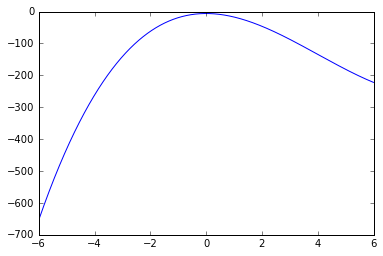

In [122]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

def univariatefunction(x): 
    return x**3-12*(x**2)-6
plt.figure()
xvals = np.arange(-6, 6, 0.001)
yvals = map(univariatefunction,xvals)
plt.plot(xvals, yvals)

#### Plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs

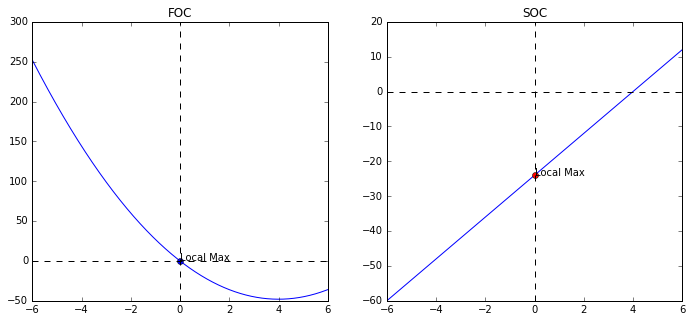

In [123]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt


def univariatefunction_firstDerivative(x): 
    return 3*x**2 - 24*x

def univariatefunction_secondDerivative(x): 
    return  6*x - 24

plt.figure(figsize=(18,5))
plt.subplot(131)
yvals = map(univariatefunction_firstDerivative,xvals)
plt.plot(xvals, yvals)
plt.plot([0], [0], 'bo')
plt.text(0, 0, "Local Max")
plt.axhline(0, color='black',linestyle='dashed')
plt.axvline(0, color='black',linestyle='dashed')
plt.title('FOC')


plt.subplot(132)
yvals = yvals = map(univariatefunction_secondDerivative,xvals)
plt.plot(xvals, yvals)
plt.text(0, -24, "Local Max")
plt.plot([0], [-24], 'ro')
plt.axhline(0, color='black',linestyle='dashed')
plt.axvline(0, color='black',linestyle='dashed')
plt.title('SOC')

#### Justify your responses using the FOC and SOC.

X = 0 is a local maximum because, 
* FOC are met because the first derivative at x = 0 is also 0
* SOC are met because the goal is to find a maximum and the second derivative is negative at x = 0


#### For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. 

In the multivariate case, we have similar FOC and SOC, except that they now apply to a point p instead of single value, and they must hold true accross all dimensions.  So for the FOC, point p is a local max or min if at that point, for each input variable, the first derivative with respect to that variable is 0. In otherwords, the gradient at point p must be 0. For the SOC, point p is a local max if at that point, for each input variable, the second derivative with respect to that variable is negative.  And point p is a local min if at that point, for each input variable, the second derivative with respect to that variable is positive.  In order words, the second graident at point p must be negative if trying to maximize or positive if trying to minimize:

|Optimization Goal|First Order Conditions                 |Second Order Conditions             |    
|-----------------|---------------------|------------------|                     
|Maximization     |$ \frac{\partial f}{\partial x_i}(p)=0 |\forall x_i \in X$|$ \frac{\partial^2 f}{\partial x_i^2}(p)<0|\forall x_i \in X$    |
|Minimization     |$\frac{\partial f}{\partial x_i}(p)=0 |\forall x_i \in X$|$ \frac{\partial^2 f}{\partial x_i^2}(p)>0|\forall x_i \in X$    |

Where X is the set of variables in the cost function f.

#### What is the Hessian matrix in this context?


The Hessian matrix is an |X| by |X| matrix that shows the result of taking the second derivative with respect to a combintion of two different variables.   For example, the function at at position i,j would be the second derivative of the cost function with respect to variable x_i and then variable x_j.

In [124]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/ceb2ef7133d4ffb011021db5f90126d42058378d")

## HW6.2
* Taking x=1 as the first approximation(xt1) of a root of $X^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)



The Newton-Raphson method formula is: 
$x_{i+1}=x_{i}- \frac{f(x_{i})}{f'(x_{i})}$


In this case, we are given f in the problem statment.  The first derivative of f is:
$$f'(x) = 3x^{2}+2$$

So now we can write the python code:

In [125]:
# x_1
x=float(1)
# Function f
f = x**3+2*x-4
# Derivative of f
f_d1 = 3*x**2+2
(x- (f/f_d1))

1.2

## HW6.3 Convex optimization 
##### What makes an optimization problem convex?

By definition, an optimization problem is convex when its cost function is convex.  This means either that it has a global minimum and the optimization goal is to minimize the cost function OR that the cost function has a global maximum and the goal is to maximize the cost function.  In other words, an optimization problem is convex when there exists a single optimal solution.

##### What are the first order Necessary Conditions for Optimality in convex optimization.

The first-order conditions for convex optimization are that the cost function is differentiable with respect to each of its input varaibles and that there exists at least one local maximum or minimum, meaning a point where the first order derivative of each variable is equal to 0:

$$
\frac{\partial f}{\partial x_i}(p_i)=0 |\forall x_i \in X |\exists p
$$

##### What are the second order optimality conditions for convex optimization? 

The second order optimality conditions for convex optimization are that the cost function is twice differentiable with respect to each input variable and that the second derivative is postive for each local minimum or negative for each local maximum (depening on whether we are seeking a global minimum or maximum respectively.  The fact that this second  derivative is positive indicates that we have found a global minimum:

$$if(f'(p) == 0): f''(p)  > 0 |\forall x \in X $$

##### Are both necessary to determine the maximum or minimum of candidate optimal solutions?

No.  Athough the second order condition requires the first order condition, the first order condition can hold true without the second order condition if the cost function is convex.

##### Fill in the BLANKS here:
Convex minimization, a subfield of optimization, studies the problem of minimizing **convex** functions over **convex** sets. The **convex** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

## HW 6.4

#### The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

$$0.5* \sum_{i=1}^n (weight_i * (W * X_i - y_i)^2)$$

#### Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.

#### Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.


Given objective function F:

$$ F(W) =0.5* \sum_{i=1}^n (weight_i * (W * X_i - y_i)^2)$$

Get the partital derivative with respect to W:

$$ F'(W) =  \frac{\partial F(W)}{\partial W} (0.5* \sum_{i=1}^n (weight_i * (W * X_i - y_i)^2))$$

This is not differentiable as is.  We need to expand the terms in the summation:

$$ F'(W) = \frac{\partial F(W)}{\partial W} ( 0.5 * \sum_{i=1}^n (weight_i *(W^2*X_i^2 + y_i^2 - 2W*X_i*y_i)) $$

Now we can differentiate with respect to W

$$  F'(W) = 0.5 * \sum_{i=1}^n weight_i * (2*W*X_i^2 - 2*X_i*y_i)$$

Factor out the constant terms:
$$   F'(W)= 0.5 * \sum_{i=1}^n 2* X_i * weight_i * (W* X_i - 2*y_i)$$

Extract the "2" from the summation and let it cancel out the .5:

$$ F'(W)= \sum_{i=1}^n X_i*weight_i *(W*X_i - y_i)$$



## HW 6.5
#### Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent. <br>
#### Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb


#### Weight each example as follows: 

$$weight(x)= abs(1/x)$$

In [126]:
%matplotlib inline
#Generate the data
import numpy as np
import pylab 
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

In [127]:
%%writefile MrJob6_5_gradientLR.py

# This MRJob will apply one iteration of gradient descent to update the slope and intercept parameters 

from mrjob.job import MRJob, MRStep
# This MrJob calculates the gradient of the entire training set      
class MrJob6_5_gradientLR(MRJob):
    
        
    def steps(self):
        return [MRStep(mapper_init=self.mapper_init,
                       mapper=self.mapper,
                       mapper_final=self.mapper_final,
                       reducer=self.reducer)] 
    
    # Read in the initial weights provided 
    def mapper_init(self):
        # Read weights file
        # NOTE - THIS NOMENCLATURE CAN BE CONFUSING!
        # self.weights represents our estimate of the model parameters
        # NOT the weights that we are adding to each point based on the 
        # weighting approach in the problem statement.
        with open('init_weights.txt', 'r') as myfile:
            self.init_preds = myfile.readline().split(',')
        self.init_preds = map(float,self.init_preds)
        self.gradient_pred = (0,0)
        self.count = 0
    
    def mapper(self, _, line):
        line = line.strip()
        line = line.split(",")
        # Get input values from data
        b0,b1 = map(float,line)
        # get predicted y value from parameters
        y = self.init_preds[0]+self.init_preds[1]*b1
        #  Update graident of predicted parameters
        self.gradient_pred=(self.gradient_pred[0]+(b0-y)/abs(b1) ,self.gradient_pred[1] + (b0-y)*b1/abs(b1))
        self.count+=1
    
    def mapper_final(self):
        # Yield final graident and number of iterations
        yield 0, (self.gradient_pred,self.count)
        
    #Collect gradients from mappers and emit average gradient values for each parameter    
    def reducer(self, _, values): 
        b0 = float(0)
        b1 = float(0)
        count = 0
        # Partial graident is tuple of parameter estimates
        for (partialgradient,partialcount)in values:
            b0 +=  partialgradient[0]
            b1 +=  partialgradient[1]
            count +=  int(partialcount)
        # Yield gradient values with no key
        yield None,(b0/count, b1/count)

    
if __name__ == '__main__':
    MrJob6_5_gradientLR.run()

Overwriting MrJob6_5_gradientLR.py


In [128]:
%load_ext autoreload
%autoreload 2
from numpy import random
from MrJob6_5_gradientLR import MrJob6_5_gradientLR

# Set learning rate and stop_critieria
learning_rate = 0.1
stop_criteria = 0.000005

# Set the initial parameters randomly per the problem statement
weights_init = [random.uniform(-3,3),random.uniform(-3,3)]
weights =weights_init
with open('init_weights.txt', 'w') as myfile:
    myfile.writelines(','.join(str(j) for j in weights))

mr_job = MrJob6_5_gradientLR(args=['LinearRegression.csv','--file','init_weights.txt'])
i = 0

#Iterate until stop condition has been met
while(1):
    with mr_job.make_runner() as runner: 
        runner.run()
        for line in runner.stream_output():
            _, (newb0,newb1) =  mr_job.parse_output_line(line)
            delta0 = learning_rate * newb0
            delta1 = learning_rate * newb1

    i +=1
    if(delta0**2 + delta1**2<stop_criteria):
        print "Convergence after ", i, "iterations:"
        print weights
        break
    else:
        weights[0] += delta0
        weights[1]+= delta1
        # Update the inital weights file with the new weights generated by MRJob
        with open('init_weights.txt', 'w') as myfile:
            myfile.writelines(','.join(str(j) for j in weights))

        


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Convergence after  27 iterations:
[-4.036092444071909, 0.9907964697512754]



#### Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)



In [129]:
import numpy
import pandas as pd

from sklearn.linear_model import LinearRegression

df = pd.read_csv("LinearRegression.csv", header=None)
df_sample= df.sample(frac=.01)

lr=LinearRegression().fit(df_sample[1].reshape(-1,1),df_sample[0])

sklearn_weights = [lr.intercept_, lr.coef_[0]]

print "Source\tIntercept\tCoefficient"
print "SKLearn\t",'\t'.join(map(str,sklearn_weights))
print "Actual\t",'\t'.join(["-4.0", "1.0"])
print "MRJob\t",'\t'.join(map(str,weights))

Source	Intercept	Coefficient
SKLearn	-3.99147766912	0.999679981567
Actual	-4.0	1.0
MRJob	-4.03609244407	0.990796469751


#### Plot the resulting weighted linear regression model versus the original model that you used to generate the data. 


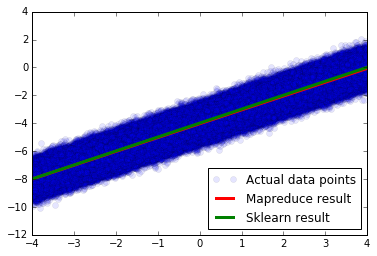

In [130]:
%matplotlib inline
X = range(-4,5)

#Function to calculate the y values across the X range for a given a set of weightings 
def get_line(w):
    return map(lambda x: w[0]+w[1] *x,X)

mr_y=get_line(weights)

sklearn_y =get_line(sklearn_weights)

# Plot the true values with blue points, the MRJob predictions with a red line, and the sklearn predictions with a green line,
plt.plot(df[1],df[0],'bo',alpha=0.1,label = "Actual data points") #Plot data points, with alpha turned down so we can see the lines
plt.plot(X,mr_y,color="red", label="Mapreduce result",lw=3) #Plot Mapreduce line
plt.plot(X,sklearn_y, color="green", label="Sklearn result",lw=3) #Plot Sklearn line
plt.legend(loc="lower right")
plt.show()

#### Comment on your findings

Both the SKLearn and the MRJob algorithms more or less correctly converge on the true parameters (-4 and 1).  Their lines are almost indistinguishable except for the color.   The MRJob algorithm produced a slightly lower intercept and a higher slope.